# PyTorch Crash Course

In [ ]:
import torch
import numpy as np

## Tensor Initialization and Tensor Properties

See the full API at https://pytorch.org/docs/stable/tensors.html

#### Initializing a 1D tensor from a list

In [ ]:
x=torch.tensor([1,2,3,4])
print(x)

#### Getting the shape of a tensor

In [ ]:
x.shape

#### Reshaping a tensor

In [ ]:
x.reshape(4,1)

In [ ]:
x.reshape(1,4)

In [ ]:
x.reshape(1,4).shape

#### Getting the type of a tensor

In [ ]:
type(x)

In [ ]:
x.dtype

#### Setting the type of a tensor

In [ ]:
x=torch.tensor([1,2,3,4]).type(torch.float)
x

In [ ]:
x.dtype

In [ ]:
x=torch.FloatTensor([1,2,3,4])
x

In [ ]:
x.dtype

#### Initializing 2D Tensors

In [ ]:
y = torch.FloatTensor([[1,2,3,4],[5,6,7,8]])
y

#### Built in Tensor Constructors

In [ ]:
torch.zeros(5)

In [ ]:
torch.ones(5)

In [ ]:
torch.rand(5)

In [ ]:
torch.eye(5)

#### Constructing tensors for Numpy arrays

In [ ]:
torch.FloatTensor(np.random.randn(5,3))

## Linear Algebra

#### Create data

In [ ]:
x=torch.FloatTensor([[1,2,3,4]])
z=torch.FloatTensor([[1,2,3,4],[5,6,7,8]])
print("x=",x)
print("z=",z)

#### Multiplication by a sclar

In [ ]:
5*x

#### Addition of a scalar

In [ ]:
x+5

#### Addition of two tensors of the same shape

In [ ]:
x+x

#### Transpose of a tensor

In [ ]:
x.T

#### Matrix Multiplication

In [ ]:
x@x.T

In [ ]:
x.T@x

In [ ]:
x@z.T

#### Elementwise multiplication (Hadamard product)

In [ ]:
x*x

## Broadcasting

#### Create data

In [ ]:
x=torch.FloatTensor([[1,2,3,4]])
y=torch.FloatTensor([[-1,-2]]).T
z=torch.FloatTensor([[1,2,3,4],[5,6,7,8]])
print("x=",x,"\n")
print("y=",y,"\n")
print("z=",z,"\n")

#### Addition with broadcasting

In [ ]:
print("x=",x,"\n")
print("y=",y,"\n")
a = x+y
print("x+y=",a)

In [ ]:
print("x=",x,"\n")
print("z=",z,"\n")
a = x+z
print("x+z=",a)

In [ ]:
print("y=",y,"\n")
print("z=",z,"\n")
a = y+z
print("y+z=",a)

#### Elementwise multiplication with broadcasting

In [ ]:
x*y

In [ ]:
x*z

In [ ]:
y*z

## Elementwise Functions

In [ ]:
x=torch.FloatTensor([[1,2,-3,-4]])
x

In [ ]:
torch.pow(x,2)

In [ ]:
x**2

In [ ]:
torch.exp(x)

In [ ]:
torch.log(x)

In [ ]:
torch.sin(x)

In [ ]:
torch.abs(x)

## Matrix Functions

In [ ]:
z = torch.FloatTensor([[2,1],[1,3]])
z

In [ ]:
torch.det(z)

In [ ]:
torch.inverse(z)

In [ ]:
torch.trace(z)

## Aggregation Functions

#### Create data

In [ ]:
x=torch.FloatTensor([[1,2,3,4]])
z=torch.FloatTensor([[1,2,3,4],[5,6,7,8]])
print("x=",x,"\n")
print("z=",z)

#### Summing over all tensor elements

In [ ]:
x.sum()

In [ ]:
z.sum()

#### Summing over a specific axis

In [ ]:
z.sum(axis=0)

In [ ]:
z.sum(axis=1)

In [ ]:
z.sum(axis=1,keepdims=True)

#### Mean and Product

In [ ]:
x.mean()

In [ ]:
x.prod()

#### Min and Max

In [ ]:
x.min()

In [ ]:
x.max()

In [ ]:
z.min()

In [ ]:
v,ind = z.min(axis=0)
print(v)
print(ind)

In [ ]:
v,ind = z.min(axis=1)
print(v)
print(ind)

## Automatic Differentiation

#### Initializing tensors

In [ ]:
x=torch.FloatTensor([[1,2,3,4],[-1,-2,-3,-4]])
y=torch.tensor([[1.0],[0.0]])
print("x=",x,"\n")
print("y=",y,"\n")


#### Initializing tensors with gradient tracking

In [ ]:
w=torch.tensor([[-1.0],[-2.0],[2.0],[1.0]],requires_grad=True)
b=torch.tensor(-1.0,requires_grad=True)
print("w=",w,"\n")
print("b=",b,"\n")

#### Checking if gradient tracking is enabled

In [ ]:
x.requires_grad

In [ ]:
w.requires_grad

In [ ]:
b.requires_grad

#### Performing Operations

In [ ]:
a=x[0,:]@w +b
a

In [ ]:
a.requires_grad

#### Computation Graph


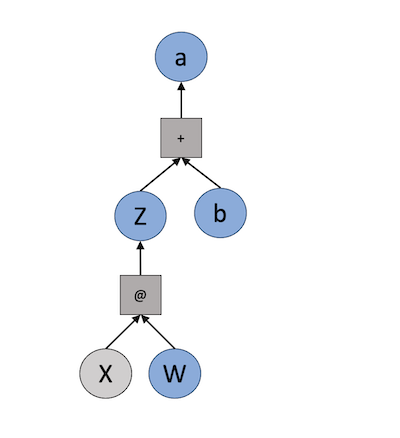

#### Getting gradient values

In [ ]:
a.backward()
print("grad_w:",w.grad,"\n")
print("grad_b:",b.grad)

#### Gradient accumulation and clearing

In [ ]:
a=x[0,:]@w +b
a.backward()
print("grad_w:",w.grad,"grad_b:",b.grad)

In [ ]:
w.grad=None
b.grad=None
a=x[0,:]@w +b
a.backward()
print("grad_w:",w.grad,"grad_b:",b.grad)

#### Hiding operations from gradient tracking

In [ ]:
w.grad=None
b.grad=None
with torch.no_grad():
    a=x[0,:]@w +b
a

#### Example: OLS gradient

In [ ]:
def mse(y,yhat):
    return torch.mean((y-yhat)**2)

w.grad=None
b.grad=None

yhat = x@w+b
loss = mse(y,yhat)
loss.backward()
print("grad_w:",w.grad,"\n")
print("grad_b:",b.grad)

## Neural Network Modules
See the full API at https://pytorch.org/docs/stable/nn.html

#### Generate data

In [ ]:
X = torch.randn(1000,2)
Y = -3*X[:,[0]] + 2*X[:,[1]]**2 + 3
Y[:5,:]

#### Defining a linear layer from scratch

In [ ]:
import torch.nn as nn

class linear(nn.Module):
    def __init__(self,d,k):
        super(linear, self).__init__()
        self.w = nn.Parameter(torch.rand(d,k))
        self.b = nn.Parameter(torch.rand(1,k))
        
    def forward(self,x):
        return x@self.w + self.b

#### Instatiating the layer and computing output

In [ ]:
model = linear(2,1)
model.forward(X[:10,:])

#### Computing a loss on the output

In [ ]:
Yhat = model.forward(X)
loss = mse(Yhat,Y)
loss

#### Manually setting parameters

In [ ]:
model.w.data = torch.zeros(2,1)
model.b.data = torch.zeros(1,1)
print("w:",model.w)
print("b:",model.b)

In [ ]:
model.forward(X[:10,:])

## Optimization

#### Defining a basic fit function

In [ ]:
def fit(model, lr, max_iter):
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    losses=[]
    for i in range(max_iter):
        Yhat = model.forward(X)
        loss = mse(Yhat,Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.detach().numpy().item())
        if(i%10==0):
            print("%d %.2f"%(i, losses[-1]))
            
    return(losses)
    

#### Instantiating models

In [ ]:
models = {"Linear":linear(2,1)}

#### Fitting models

In [ ]:
losses = {}
for m in models:
    print("Learning model: %s"%m)
    losses[m] = fit(models[m], 0.05, 100)
    print()

#### Plotting losses

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
for m in models:
    plt.plot(losses[m])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(list(models.keys()))
plt.title("Training Loss vs Epoch")
plt.grid(True)

#### Computing error of fit models with eval and no_grad

In [ ]:
Xte = torch.randn(1000,2)
Yte = -3*Xte[:,[0]] + 2*Xte[:,[1]]**2 + 3

te_err={}
for m in models:
    models[m].eval()
    with torch.no_grad():
        te_err[m]=mse(Yte,models[m].forward(Xte))
        print("%s test error: %.2f"%(m,te_err[m]))
